In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
df_sac_human_avg = pd.read_csv('./average-performance/sac-human-average.csv')
df_sac_per_avg = pd.read_csv('./average-performance/sac-per-average.csv')
df_sac_avg = pd.read_csv('./average-performance/sac-average.csv')

df_drq_human_avg = pd.read_csv('./average-performance/drq-human-average.csv')
df_drq_avg = pd.read_csv('./average-performance/drq-average.csv')
drq_all = pd.read_csv('./average-performance/drq-all.csv')

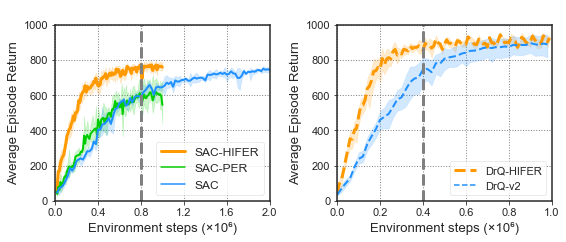

In [4]:
f = plt.figure(figsize=(8, 3.5))

plt.rcParams.update({'font.size': 11})


# 调色盘
enmax_palette = ["#CC0000", "#FF9900", "#00CD00", "#1e90ff", "#0099ff"]
color_codes_wanted = ['red', 'orange', 'green', 'blue', 'purple']

my_palette = sns.color_palette(['#1e90ff', '#FF9900'])

c = lambda x: enmax_palette[color_codes_wanted.index(x)]
# sns.set_style("ticks",{"axes.facecolor":'#FFFFFF', "axes.linewidth": 5})


f.add_subplot(121)
sns.set_style("ticks",{"axes.facecolor":'#FFFFFF',"axes.linewidth": 5})
plt.grid(b=True, ls=':', color='grey', lw=1)
plt.title(' ')
plt.xlabel('Environment steps (×10⁶)')
plt.ylabel('Average Episode Return')
plt.xlim(0,2000000)
plt.ylim(0,1000)

ax = sns.lineplot(x="step", y="average_return", color=c("orange"), lw=3, data=df_sac_human_avg)
sns.lineplot(x="step", y="average_return", color=c("green"), lw=2, data=df_sac_per_avg)
sns.lineplot(x="step", y="average_return",color=c("blue"), lw=2, data=df_sac_avg)
plt.axvline(x=800000, color='grey', linestyle='--', lw=3)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000)))
ax.set_xticks(range(0,2400000,400000))
plt.plot([], [], color=c("orange"), label='SAC-HIFER', lw=3)
plt.plot([], [], color=c("green"), label='SAC-PER')
plt.plot([], [], color=c("blue"), label='SAC')
# 自定义图例
plt.legend(loc='lower right', frameon=True, fontsize=12)


# 加粗外框线
for spine in ax.spines.values():
    spine.set_linewidth(1.5)


f.add_subplot(122)
plt.grid(b=True, ls=':', color='grey', lw=1)
plt.title(' ')
plt.xlabel('Environment steps (×10⁶)')
plt.ylabel('Average Episode Return')
plt.xlim(0,1000000)
plt.ylim(0,1000)
# sns.set_style("ticks",{"axes.facecolor":'#FFFFFF'})
ax = sns.lineplot(x="frame", y="average_return",color=c("orange"), lw=3, data=df_drq_human_avg,linestyle='--')
sns.lineplot(x="frame", y="average_return",color=c("blue"), lw=2, data=df_drq_avg, linestyle='--')

# 中间间隔的加粗虚线
plt.axvline(x=400000, color='grey', linestyle='--', lw=3)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000)))

plt.plot([], [], color=c("orange"), label='DrQ-HIFER', lw=3, linestyle='--')
plt.plot([], [], color=c("blue"), label='DrQ-v2', linestyle='--')
# 自定义图例
plt.legend(loc='lower right', frameon=True, fontsize=12)
plt.legend()

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

    
plt.tight_layout()
plt.show()

In [5]:
# figure = ax.get_figure()
f.savefig('./image/fig3.pdf',dpi=300)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
df_sac_human_avg = pd.read_csv('./average-performance/sac-human-average.csv')
df_sac_avg = pd.read_csv('./average-performance/sac-average.csv')
df_wiout_on_avg = pd.read_csv('./ablation_study/without_on/avg_on.csv')
df_without_repeat_avg = pd.read_csv('./ablation_study/without_repeat/average-performance.csv')

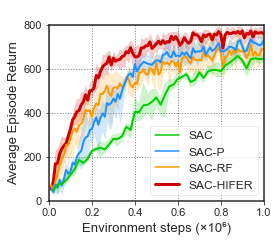

In [3]:
plt.figure(figsize=(4, 3.5))
plt.rcParams.update({'font.size': 11})

# 调色盘
enmax_palette = ["#CC0000", "#FF9900", "#00CD00", "#1e90ff"]
color_codes_wanted = ['red', 'orange', 'green', 'blue']
c = lambda x: enmax_palette[color_codes_wanted.index(x)]
sns.set_style("ticks",{"axes.facecolor":'#FFFFFF'})


plt.grid(b=True, ls=':', color='grey', lw=1)
plt.title(' ')
plt.xlabel('Environment steps (×10⁶)')
plt.ylabel('Average Episode Return')
plt.xlim(0,1000000)
plt.ylim(0,800)
sns.set_style("ticks",{"axes.facecolor":'#FFFFFF'})
ax = sns.lineplot(x="step", y="average_return", color=c("red"), lw=3, data=df_sac_human_avg)
sns.lineplot(x="step", y="average_return", color=c("orange"), lw=2, data=df_wiout_on_avg)
sns.lineplot(x="step", y="average_return",color=c("blue"), lw=2, data=df_without_repeat_avg)
sns.lineplot(x="step", y="average_return",color=c("green"), lw=2, data=df_sac_avg)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000)))
ax.set_yticks(range(0,1000,200))

plt.plot([], [], color=c("green"), label='SAC')
plt.plot([], [], color=c("blue"), label='SAC-P')
plt.plot([], [], color=c("orange"), label='SAC-RF')
plt.plot([], [], color=c("red"), label='SAC-HIFER', lw=3)
# 自定义图例
plt.legend(loc='lower right', frameon=True, fontsize=12)

# 加粗外框线
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    
plt.tight_layout()
plt.show()

In [4]:
figure = ax.get_figure()
figure.savefig('./ablation_study/average-ablation.pdf',dpi=300)

In [ ]:
''' 绘制柱状图 '''

In [6]:
df_sac = pd.read_csv('./average-performance/average1.csv')
df_drq = pd.read_csv('./average-performance/average2.csv')

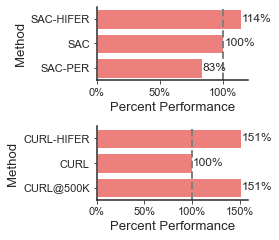

In [7]:
plt.rcParams.update({'font.size': 11})

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(4, 3.5))
# plt.figure(figsize=(4, 3.5))
# sns.set(font_scale=1.5)


sns.set(style="white")
# fig,ax1 = plt.subplots(1,1,figsize=(6,3),sharex=True)

ax1 = plt.subplot(211)
sns.barplot(y="Method", x="Percent Performance", data=df_sac, hue="class", palette="blend:#ff6f69,#ff6f69",ax=ax1)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
# ax1.set(xlabel="Percent Performance")


# 在每个柱子的顶部显示具体 y 轴数值
for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 0.01, p.get_y() + p.get_height() / 2. + 0.1, '{:.0%}'.format(width), ha="left")   

for spine in ax1.spines.values():
    spine.set_linewidth(1.5)
    
    
# 四边的边框
sns.despine(bottom=False,left=False)
# 垂直虚线
plt.axvline(x=1, color='grey', linestyle='--', lw=2)
# 移除图例
ax1.legend_.remove()



ax2 = plt.subplot(212)
sns.set(style="white")
# fig,ax1 = plt.subplots(1,1,figsize=(6,2),sharex=True)

sns.barplot(y="Method", x="Percent Performance", data=df_drq, hue="class", palette="blend:#ff6f69,#ff6f69",ax=ax2)
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

# 在每个柱子的顶部显示具体 y 轴数值
for p in ax2.patches:
    width = p.get_width()
    ax2.text(width + 0.01, p.get_y() + p.get_height() / 2. + 0.1, '{:.0%}'.format(width), ha="left")
    
    
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)
    
    # 四边的边框
sns.despine(bottom=False,left=False)
# 垂直虚线
plt.axvline(x=1, color='grey', linestyle='--', lw=2)
# 移除图例
ax2.legend_.remove()

plt.tight_layout()

In [8]:
# figure = ax1.get_figure()
fig.savefig('./image/average-1.pdf',dpi=300)